# Project: Investigate a Dataset - No show appointments
## - by Robert Weber
<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I will be analyzing a dataset containing information of about 100k medical appointments in Brazil. The dataset provides features related to the question wheater a patient is showing up for an appointment or not.

In particular I'm interested in finding out which factors are influencing the no-show appointments to better predict if a patient will show up or not based on the trends of the various features provided in the dataset. So the "No-show" will be my dependend variable.

I think that the most influence will come from columns like the SMS_received, ScheduledDay and AppointmentDay, the Neighbourhood and the Gender. I will also have a look at the Age and the Neighboorhood features to see if they also influence the No-show.

### Questions for Analysis
<ol>
<li>Does it influence the no-show if the patient received an SMS before?</li>
<li>Which neighbourhood has the highest rate in now-show appointments?</li>
<li>Does the gender of the patient influence the no-show?</li>
<li>Which influence has the age of a patient in the no-show?</li>
<li>Has the booking time an influence in the now-show?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install -U seaborn
%matplotlib inline

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


<a id='wrangling'></a>
## Data Wrangling


### General Properties
I start the data wrangling process by first loading in the data and then looking at the data from various angles to get a better understanding of the dat I'm working with.

In [2]:
# Load data and look at the first lines 
appointments=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Look at the tail of the dataset
appointments.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Observations

In [4]:
#Look for data types and missing values
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#List all columns with null values
appointments.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Look for duplicate rows
sum(appointments.duplicated())

0

In [7]:
#Looking at the shape and the dispersion
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Have a closer look at the values in the feature "Handcap"
appointments["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

### Observations

General observations
<ul>
<li>We have in total 14 columns and 110527 rows in the dataset.</li>
<li>There are no duplicate rows in the dataset.</li>
<li>Also there are no columns with missing values.</li>
</ul>

Data cleaning observations
<ol>
<li>The"Age" feature contains negative age values</li>
<li>A dash in feature title "No-show"</li>    
<li>Uppercase values in the feature "Neighbourhood"</li>    
<li>The "Handcap" feature contains values other than "0" or "1"</li>
<li>The "ScheduledDay" is a string instead datetime format</li>
<li>The "AppointmentDay" feature is a string and contains time formatting</li>
<li>Features "PatientId" and "AppointmentID" are not needed for the exploration </li>
<li>The "No-show" column conatins "yes" and "no" instead 1 and 0</li>   
</ol>


### Data Cleaning
In this part I clean up and change the data based on the findings from the previous section.

### 1. The "Age" feature contains negative age values
#### Define
As there is a negative value in the "Age" feature I need to remove it to only keep values >=0 in the dataset.
#### Code

In [9]:
# Remove the line with -1 in "Age"
appointments = appointments.query("Age != '-1' ")

#### Test

In [10]:
appointments.Age.min()

0

### 2. A dash in feature title "No-show"
#### Define
There is a dash in the name of the column "No-show" that I will replace with an underscore for preventing upcoming errors in working with the feature.

#### Code

In [11]:
appointments=appointments.rename(columns={'No-show':'No_show'})

### 3. Uppercase values in the feature "Neighbourhood"
#### Define
All values int he the "Neighbourhood" feature are written in uppercase and for better readability I will convert them to title case.
#### Code

In [12]:
appointments["Neighbourhood"] = appointments["Neighbourhood"].str.title()

#### Test

In [13]:
appointments["Neighbourhood"].head()

0      Jardim Da Penha
1      Jardim Da Penha
2        Mata Da Praia
3    Pontal De Camburi
4      Jardim Da Penha
Name: Neighbourhood, dtype: object

### 4. The "Handcap" feature contains values other than "0" or "1"
#### Define
As only values of "0" and "1" are possible as values in the feature "Handcap", I remove all rows containing values bigger than "1".
#### Code

In [14]:
appointments=appointments.query("Handcap < 2")

#### Test

In [15]:
appointments.Handcap.value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

### 5. The "ScheduledDay" feature is a string and contains time formatting
#### Define
The column contains the time and date an appointment was scheduled. As the time i not relevant for my further analysis, I will remove the time to only leave the date and convert it into datetime format.

#### Code

In [16]:
appointments["ScheduledDay"] = pd.to_datetime(appointments["ScheduledDay"]).dt.date
appointments["ScheduledDay"] = pd.to_datetime(appointments["ScheduledDay"])

#### Test

In [17]:
appointments["ScheduledDay"].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]

### 6. The "AppointmentDay" feature is a string and contains time formatting
#### Define
The column is a string object and contains time formatting information that are not needed as the column should only carry date values. I will therefore change the formatting to datetime format only containing information about the date.
#### Code

In [18]:
appointments["AppointmentDay"] = pd.to_datetime(appointments["AppointmentDay"])

#### Test

In [19]:
appointments["AppointmentDay"].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

### 7. Features "PatientId" and "AppointmentID" are not needed for the exploration
#### Define
As the features "PatientId" and "AppointmentID" are not needed for the exploration I will remove them from the dataset.

#### Code

In [20]:
# Drop unneeded columns
appointments.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

#### Test

In [21]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No_show           110327 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


### 8. The "No-show" column conatins "yes" and "no" instead 1 and 0
#### Define
The "No-show" column contains "Yes" and "No" for the status of a patient showing up at the appointment. As all other columns for givinf out a status of yes or no provinf a 1 or a 0, I will replace the "Yes" with 1 and the "No" with 0. Also I will transform the column to an int64 to later make a numeric based correlation analysis possible.

#### Code

In [22]:
# Replace values
appointments=appointments.replace({'No_show':{'Yes':'1','No':'0'}})

# Convert into int64
appointments["No_show"] = appointments["No_show"].astype(np.int64)

#### Test

In [23]:
appointments.No_show.value_counts()

0    88049
1    22278
Name: No_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1. Does it influence the no-show if the patient received an SMS before?

As I want to know about the factors that influence if a patient is going to show up at an appointment or not, I start by looking at the value of interest first. I'll have a look at the distribution of the "No-show" feature.

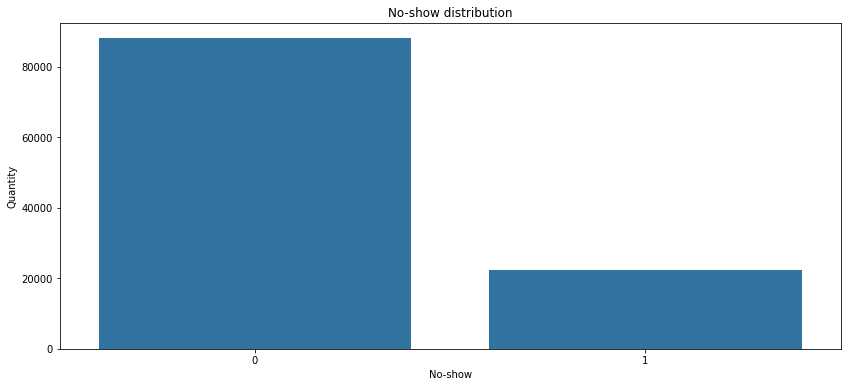

In [24]:
# Plot histogram
plt.figure(figsize=[14,6])
color=sb.color_palette()[0]
sb.countplot(data=appointments, x='No_show', color=color)

plt.xlabel('No-show')
plt.ylabel('Quantity')
plt.title('No-show distribution');

Looking at the distribution we see that the majority of the patients indeed showed up to their booked appointments. While approximately 20k patients didn't show up, over 80k patients showed up to their bookings.

#### SMS received distribution
Prior to the appointment there is an SMS going to be send out to the patient reminding them on the upcoming appointment. Next I want to know about the distribution of the SMS that were or weren't send out to the patients.

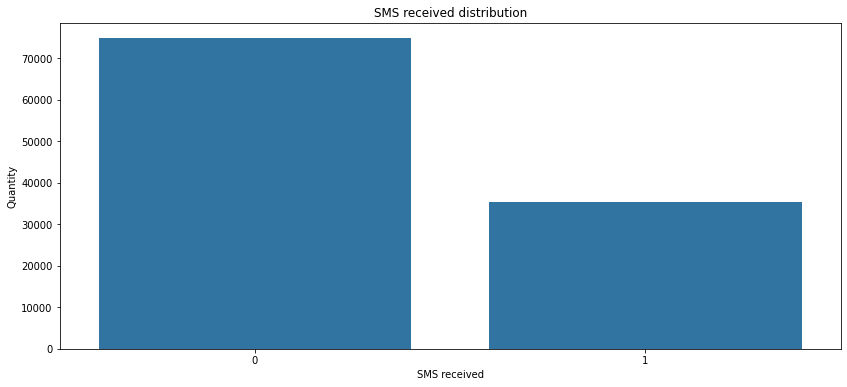

In [25]:
# Plot histogram
plt.figure(figsize=[14,6])
color=sb.color_palette()[0]
sb.countplot(data=appointments, x='SMS_received', color=color)

plt.xlabel('SMS received')
plt.ylabel('Quantity')
plt.title('SMS received distribution');

Surprisingly only one-third of all the patients received an SMS prior to their appointment, while two-third never got an SMS. Let's see in the next step a bivariate exploration of the interaction between the two SMS-received and the Now-show.

#### Now-show vs SMS-received

In [26]:
# Create subset pf patients that did and didn't show up
show_up_yes = appointments.No_show == 0
show_up_no = appointments.No_show == 1

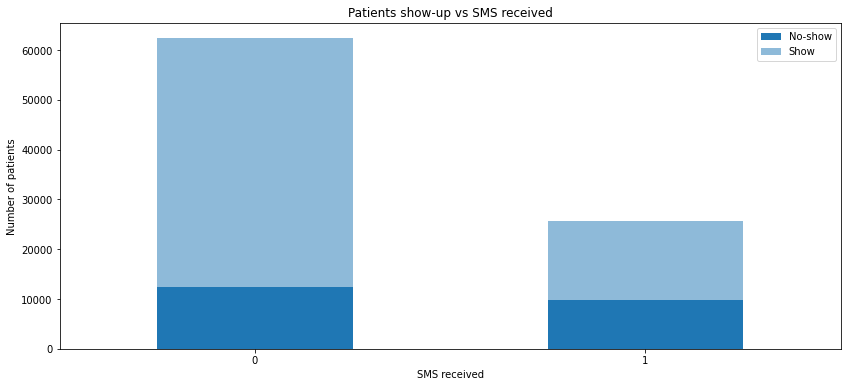

In [27]:
# Plot
plt.figure(figsize=[14,6])
color=sb.color_palette()[0]
appointments.SMS_received[show_up_no].value_counts().plot(kind="bar", label='No-show', color=color)
appointments.SMS_received[show_up_yes].value_counts().plot(kind="bar", alpha=0.5, label='Show', color=color)

plt.xlabel("SMS received")
plt.ylabel("Number of patients")
plt.title("Patients show-up vs SMS received")
plt.xticks(rotation=360)
plt.legend();

The plot shows the distribution of people not receiving an SMS prior the appointment on the left bar versus people receiving an SMS prior the appointment on the right. Looking at the left bar, we see that over 60k patients didn't receive an SMS but showed up to appointments, while around 12k patients without getting an SMS didn't show up.
Looking at the right bar we see people that got an SMS. Here around 25k showed up to the appointments, while around 12k didn't show up. So surprisingly sending out an SMS prior to the appointment doesn't seem to have a positive influence in predicting if a patient shows up or not. The bar with the data showing patients that got an SMS even shows a more worse ratio in people not going than with people that didn't receive an SMS.
The vast majority of patients showed up at appointments without receiving an SMS and even the SMS didn't reduce the number of no-showers significantly.

### Question 2. Which neighbourhood has the highest rate in now-show appointments?
I want to find out if there is a neighbourhood that shows a high count in patients that don't show up for an appointment to see of the neighbourhood has an influence in predicting the no-show. I start by looking at the distribution of patients per district and continue by looking at the relationship between the districts and the no-show feature next.

#### Neighbourhood distribution
This feature shows us in which neighbourhood the appointment takes place. I'll plot the distribution to see which neighbourhoods have the most appointments.

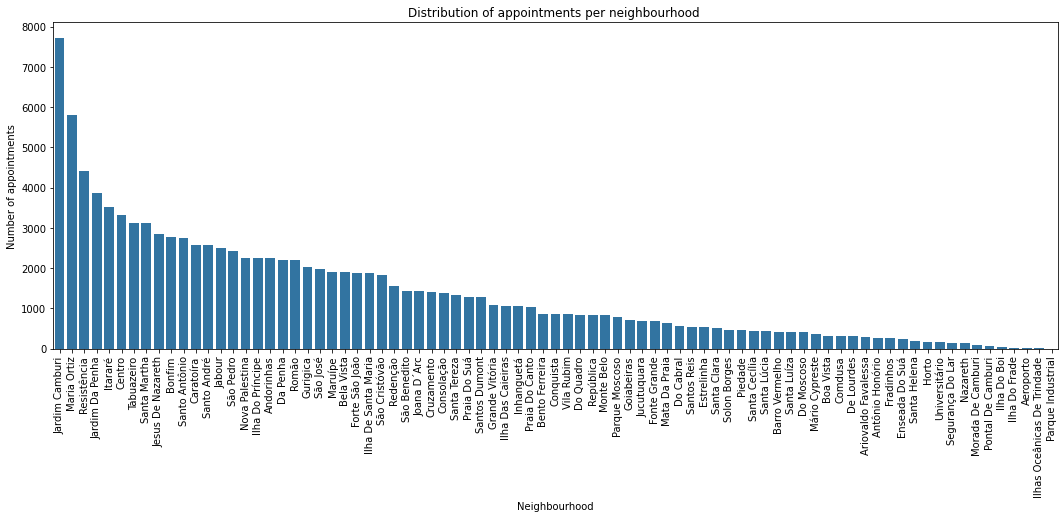

In [28]:
# Plot
plt.figure(figsize=[18, 6])
color=sb.color_palette()[0]
count=appointments['Neighbourhood'].value_counts().index

sb.countplot(data=appointments, x='Neighbourhood', color=color, order=count)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of appointments')
plt.title('Distribution of appointments per neighbourhood ')
plt.xticks(rotation=90);

Most appointments take place in the neighbourhood "Jardim Camburi" with almost 8.000 appointments, followed by "Maria Ortez" with nearly 6.000, and "Resistência" with nearly 4.500 appointments. The following appointments are all below 4.000 for every neighbourhood, going down to even low digits beneath 100.

#### No-show vs Neighbourhood
I now check the correlation between the neighbourhood and the no-show in more detail.

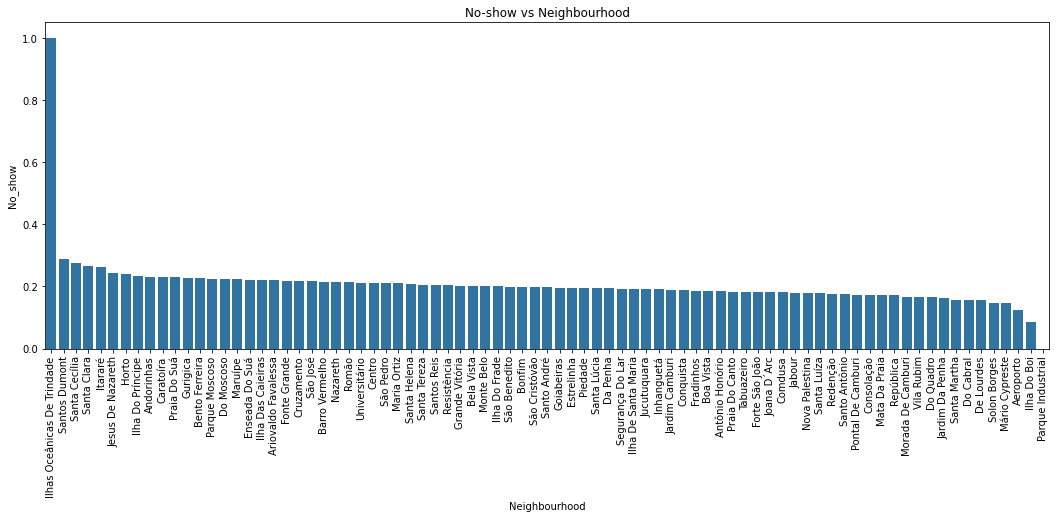

In [29]:
# Plot
plt.figure(figsize=[18, 6])
color=sb.color_palette()[0]
count=appointments.groupby(['Neighbourhood']).mean().sort_values('No_show', ascending=False).index

sb.barplot(data=appointments, x='Neighbourhood', y='No_show', color=color, order=count, ci=None)
plt.xlabel('Neighbourhood')
plt.ylabel('No_show')
plt.title("No-show vs Neighbourhood")
plt.xticks(rotation=90);

Taking into account that every patient in neighbourhood "Ilhas Oceânicas De Trindade" didn't show up at the appointment, we can identify this neighbourhood as an outlier, as it has the second-lowest person count in the neighbourhood distribution from the plot before.
The neighbourhoods with the highest no-show rates are "Santos Dumont", "Santa Cecilia", and "Santa Clara", all with a mean of between 0.25 and 0.3. The rest of the neighbourhoods has a mean of between 0.25 and 0.2, ergo a better rate of patients showing up at appointment. But overall the neighbourhood feature doesn't provide a good indication on predicting the no-show alone.

### Question 3. Does the gender of the patient influence the no-show?

As it is commonly known that women take more care of her health than men, I want to see if this shows up in the data as well. I will first look at the distribution of the gender and then look at the correlation between the gender and the No-show.

#### Gender distribution
With the gender the dataset contains information about women and men and I'll plot their distribution.

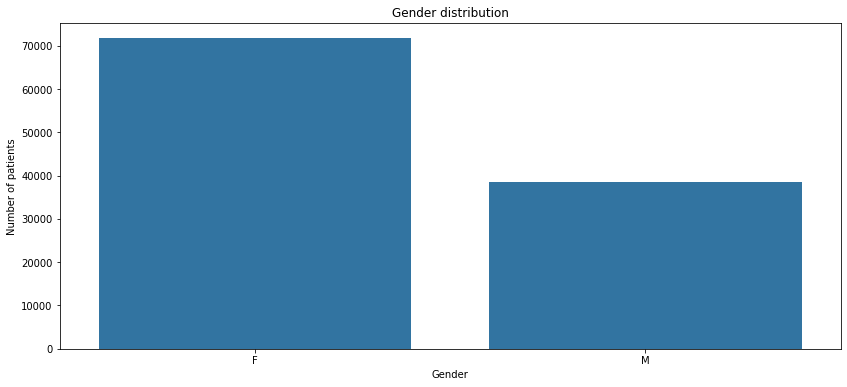

In [31]:
# Plot histogram
plt.figure(figsize=[14,6])
color=sb.color_palette()[0]
sb.countplot(data=appointments, x='Gender', color=color)

plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Gender distribution');

With over 70k, most of the patients are women, shown in the left bar with the letter "F". Men show up in the right bar with neraly 40k patients.

#### Gender vs No-show
I'll now plot the distribution between the gende rand the no-show to see if there are notable relations amonngst them.

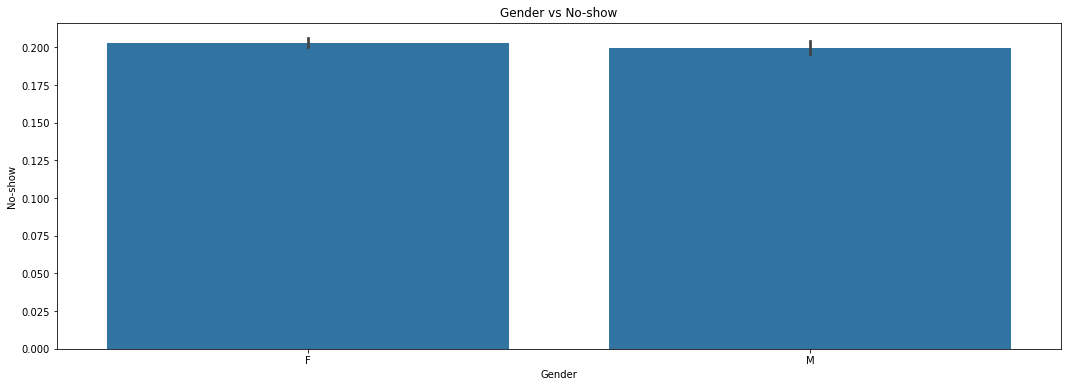

In [32]:
plt.figure(figsize=[18, 6])
color=sb.color_palette()[0]

sb.barplot(data=appointments, x='Gender', y='No_show', color=color)
plt.xlabel('Gender')
plt.ylabel('No-show')
plt.title("Gender vs No-show");

Comparing the male and female patients against the No-show provides surprising results. Both female and male patients are alike in showing up or not showing up at the made appointments as there are no significant differences to see. Both bars are almost identical, but taking the error score into account, we can say that independent of being male or female, a patient's gender does not relate to no-show.

### Question 4. Which influence has the age of a patient in the no-show?

I think the age of a patient plays a significant role in predicting of a patient shows up to an appointment or not. I think that with a higher age and a tendency to more severe health problems, the patients make sure to not miss their scheduled appointments. I therefore have a look at the age distribution first, before looking closer at the no-show per age.

#### Age distribution
The "Age" feature contains the ages of the patient I hereby plot.

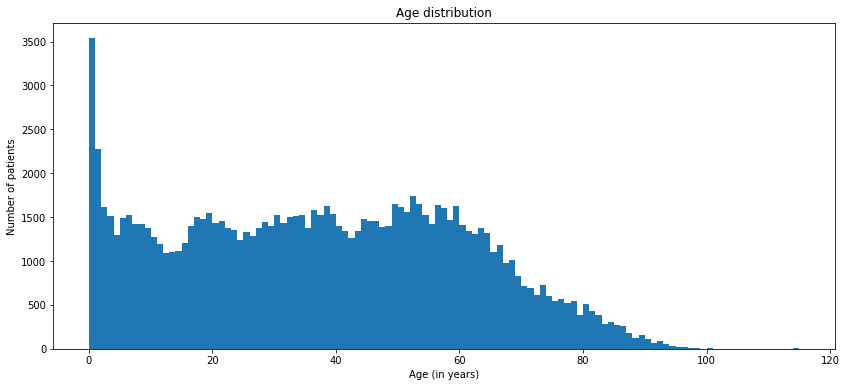

In [33]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]

plt.hist(data=appointments, x='Age', bins=115);
plt.xlabel('Age (in years)')
plt.ylabel('Number of patients')
plt.title('Age distribution');

The most often occuring ages are the ages of Zero (3.500 patients) and One (around 2.300 patients). As both ages would indicate babies as patients, a Zero would indicate that the babies have not yet turned one year old and are only a couple of weeks or months old. The number of patients sharing the same ages is relatively constant between 1.000 and 1.500 patients per age, with a constant decline of patients beginning at the age of 60.

#### No-show per age
I now want to know if there is a trend in showing up or not per age. I will therefore plot the distribution of the No-show amongst the age.

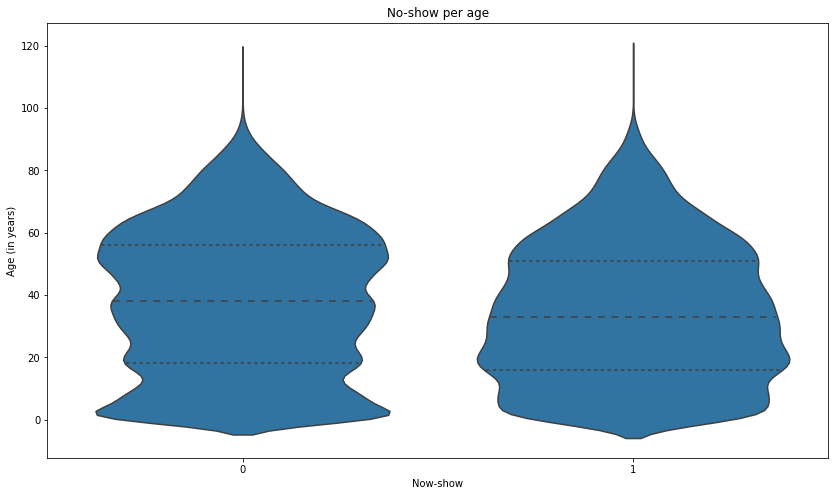

In [34]:
# Plot
plt.figure(figsize=[14, 8])
color=sb.color_palette()[0]

sb.violinplot(data=appointments, x='No_show', y='Age', color=color, inner='quartile')
plt.xlabel('Now-show')
plt.ylabel('Age (in years)')
plt.title('No-show per age');

The plot shows a clear difference between the ages and their likeliness of showing up or not. Starting at low age, the number of taken appointments is higher than non-taken appointments, as children seem to be taken by their parents to the doctors more regularly. Continuing by looking at teenagers and young adults, we see that patients between 15 and 20 years old tend to miss their appointments more often than attenting their appointments. Looking at the age groups above we see that with a growth in age the number of no-shows is getting lower evenly as people seem more to care about their health and or ar helth problems are on the rise.

### Question 5. Has the booking time an influence in the no-show?
A patient has to book the appointment in advance to the appointment taking place. We have information on the date of the booking and additionally information on the date of the appointment. I will look at the number of day between the booking and the appointment and later will set it in comparison with the no-show. I am curious to see if it is more likely to miss appointments if there is a longer timespan between the booking and the appointment.

#### Timespan distribution
First I need to create a new column containing the time in days between the ScheduledDay and the AppointmentDay. Then I will plot the distribution of days.

In [35]:
# Create new column "time_difference"
appointments['Time_difference'] = (appointments["AppointmentDay"] - appointments["ScheduledDay"]).dt.days

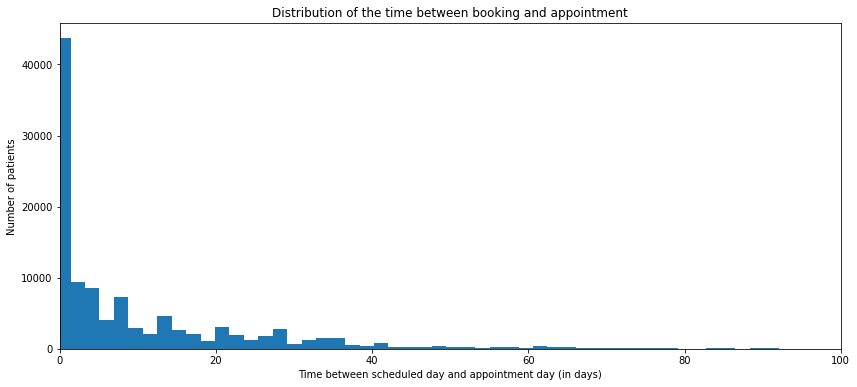

In [36]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]

plt.hist(data=appointments, x='Time_difference', bins=100)
plt.xlabel('Time between scheduled day and appointment day (in days)')
plt.ylabel('Number of patients')
plt.title('Distribution of the time between booking and appointment')
plt.xlim(0,100);

I created a column showing the number of days between the booking and the actual appointment. The plot now shows that the vast majority of the appointments took place at the same day the booking was made, visualized by the zero with over 40k patients. Then most patients following after booked 1-20 days before the appointment with patients that booked more than three months in advance to their appointments.

#### Timespan vs No-show

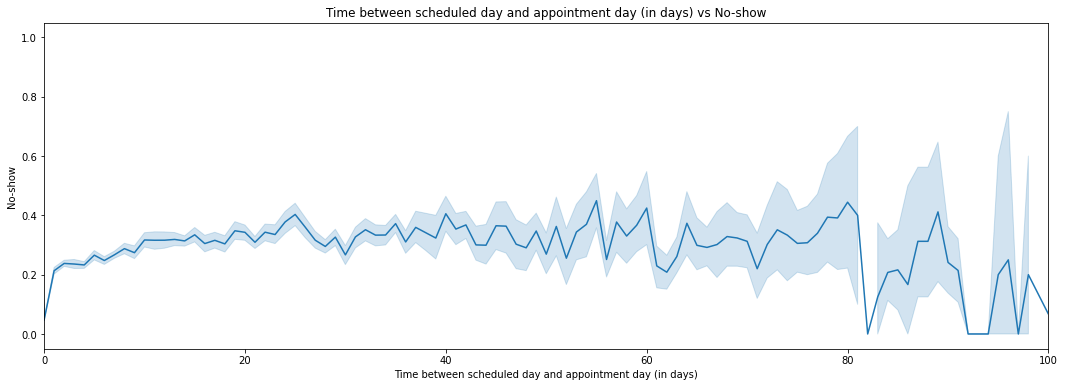

In [37]:
# Plot
plt.figure(figsize=[18, 6])
color=sb.color_palette()[0]
sb.lineplot(data=appointments, x='Time_difference', y='No_show', color=color)

plt.xlabel('Time between scheduled day and appointment day (in days)')
plt.ylabel('No-show')
plt.title("Time between scheduled day and appointment day (in days) vs No-show")
plt.xlim(0,100);

Patients booking at the day the are going to have the appointment have a really high chance of actually showing up, with a mean of nearly 0.1 (the maximum would be a now-show with 1.0). We see the tendencey that the higher the timespan between the scheduled day and the appointment day, the higher the chance the patients don't show up. The rate is growing up to approximately 3 weeks time between the scheduling and the appointment with a mean of up to 0.4. Then the rate is more or less staying at that level, with numbers going slightly up and down. But when looking the the plot about the distribution before, we can see that the provided data gets more unreliable after 40 days in difference as the number of patients with these high number of days also gets fewer.

<a id='conclusions'></a>
## Conclusions

In order to find out what factors are influencing if a patient shows up to a booked appointment or not, I had a look at various features with the following outcomes:  

<ol>
<li>Other than predicted before, receiving an SMS reminder prior to the appointment doesn't lead to a lower no-show rate. Comparing the data with people that didn't get an SMS we even see that the number of no-shower is higher after getting and SMS.</li>
<li>By looking at the neighbourhoods I found out that the areas of "Santos Dumont", "Santa Cecilia", and "Santa Clara" have the highest rates of patients not showing up. Other areas have slightly better show-up rates, but the explored results don't provide enought backing to be correlated with the no-show rate.</li>
<li>As women tend to take more care of her health than men, I was eager to find out the same in the dataset. But the no-show rate is the same for men and women and the "Age" feature doesn't help in predicting the no-show.</li>
<li>The age of the patients proved to provide some correlation with the no-show. While more young adult patients tend to not show up at appointments than showing up, this changes with an increase in age. The older the patients the more likely they show up at the appointments than not showing up.</li>
<li>The time between the scheduling of the appointment and the actual day of the appontment also play a role in predicting the no-show. Patients that booked appointments on short notice with only a few days ( smaller than five) between scheduled day and appointment day, have a higher change for showing up. The longer an appontment is is in the future based on the scheduling day, the more likely it is that patients don't show up. A reason could be that patients having sudden issues like to be treated rather quick and therefore book appointments in the near future to get help as soon as possible.</li>
</ol>


A limitation of exploration was in the missing information regarding some dataset features. The SMS_received feature seems to be very usefull, but there was no information on when the SMS were sent out or how many SMS were sent out. The quality of the exploration and the findings would have been more insightful.
Also the Neighbourhood feature showed the neighbourhoods the appointments takes place in. But there was no information on if the patients actualy lived in the same neighbourhoods or needed to travel there from other neighbourhoods. This knowledge would have been interesting to know as it could have had an impact on the now-show as well.

## Submitting your Project 

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0